<a href="https://colab.research.google.com/github/DataEtnos/DataEtnos/blob/main/TREINOS_DE_REGRESS%C3%83O_LINEAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [280]:
#Setup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




#machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder, StandardScaler
from sklearn import metrics
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


In [281]:
df = pd.read_csv("/content/insurance.csv")
df.head()

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.560,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idade              1341 non-null   int64  
 1   sexo               1338 non-null   object 
 2   imc                1341 non-null   float64
 3   quantidade_filhos  1341 non-null   int64  
 4   fumante            1341 non-null   object 
 5   regiao             1341 non-null   object 
 6   custos_seguro      1341 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.5+ KB


In [283]:
df.describe()

,idade,imc,quantidade_filhos,custos_seguro
count,1341.000000,1341.000000,1341.000000,1341.000000
mean,39.186428,30.684903,1.092468,13240.734520
std,14.040969,6.107806,1.205254,12112.696927
min,18.000000,15.960000,0.000000,0.000000
25%,27.000000,26.315000,0.000000,4719.524050
50%,39.000000,30.400000,1.000000,9361.326800
75%,51.000000,34.770000,2.000000,16586.497710
max,64.000000,53.130000,5.000000,63770.428010


In [284]:
df.isnull().sum()

idade                0
sexo                 3
imc                  0
quantidade_filhos    0
fumante              0
regiao               0
custos_seguro        0
dtype: int64

In [285]:
df.dropna(inplace=True)

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 1340
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idade              1338 non-null   int64  
 1   sexo               1338 non-null   object 
 2   imc                1338 non-null   float64
 3   quantidade_filhos  1338 non-null   int64  
 4   fumante            1338 non-null   object 
 5   regiao             1338 non-null   object 
 6   custos_seguro      1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [287]:
for column in df.columns:
  print(df[column].value_counts())
  print('\n')

idade
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64


sexo
male      676
female    662
Name: count, dtype: int64


imc
32.300    13
28.310     9
30.875     8
31.350     8
28.880     8
          ..
46.700     1
46.200     1
23.800     1
44.770     1
30.970     1
Name: count, Length: 549, dtype: int64


quantidade_filhos
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


fumante
no     1064
yes     274
Name: count, dtype: int64


regiao
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


custos_seguro
1639.56310     2


In [288]:
df.columns

Index(['idade', 'sexo', 'imc', 'quantidade_filhos', 'fumante', 'regiao',
       'custos_seguro'],
      dtype='object')

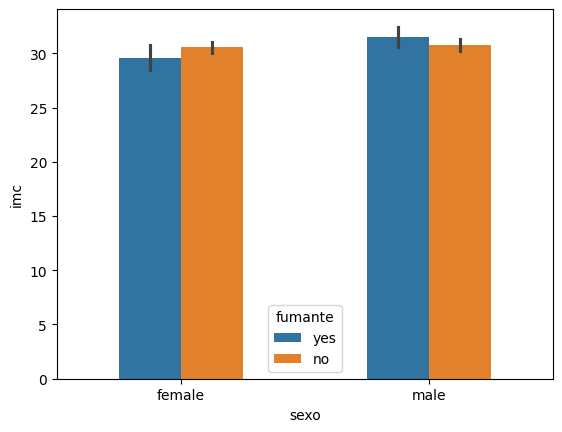

In [289]:
#comparação de fumantes imc  por sexo
bar_plot = sns.barplot(data=df, x='sexo', y='imc', hue='fumante',width = 0.5)


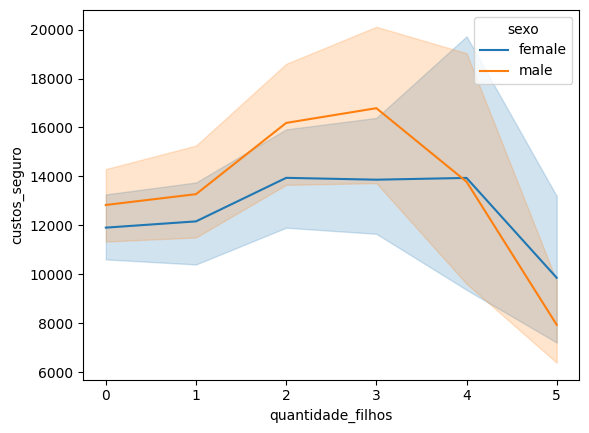

In [290]:
lineplot = sns.lineplot(data=df, x='quantidade_filhos', y='custos_seguro', hue='sexo')

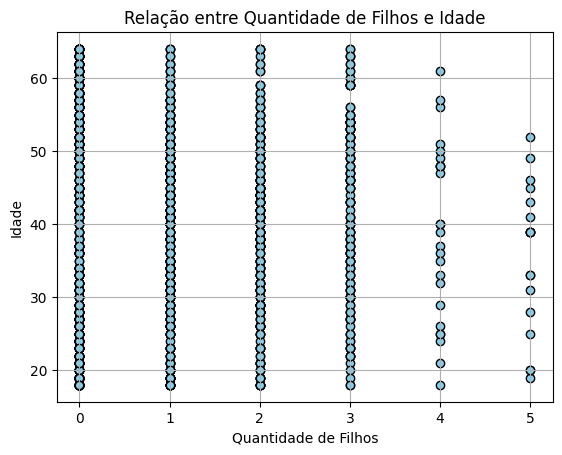

In [291]:
plt.scatter(df['quantidade_filhos'], df['idade'], color='skyblue', edgecolor='black')


plt.title('Relação entre Quantidade de Filhos e Idade')
plt.xlabel('Quantidade de Filhos')
plt.ylabel('Idade')
plt.grid(True)


plt.show()

In [292]:
df.head()

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.560,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [293]:

encoder = LabelEncoder()
df['sexo'] = encoder.fit_transform(df['sexo'])
df['fumante'] = encoder.fit_transform(df['fumante'])
df['regiao'] = encoder.fit_transform(df['regiao'])

In [294]:
scaler = MinMaxScaler()
df[['idade', 'quantidade_filhos', 'imc', 'custos_seguro']] = scaler.fit_transform(df[['idade', 'quantidade_filhos', 'imc', 'custos_seguro']])

In [295]:
df.head()

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
0,0.021739,0,0.321227,0.0,1,3,0.251611
1,0.000000,1,0.479150,0.2,0,2,0.009636
2,0.217391,1,0.473500,0.6,0,2,0.053115
3,0.326087,1,0.181464,0.0,0,1,0.333010
4,0.304348,1,0.347592,0.0,0,1,0.043816


In [296]:
df.describe()

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.461022,0.505232,0.395583,0.218984,0.204783,1.515695,0.193916
std,0.305434,0.500160,0.164067,0.241099,0.403694,1.104885,0.193301
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.000000,0.278080,0.000000,0.000000,1.000000,0.057757
50%,0.456522,1.000000,0.388485,0.200000,0.000000,2.000000,0.131849
75%,0.717391,1.000000,0.504002,0.400000,0.000000,2.000000,0.247700
max,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [297]:
x = df.drop('custos_seguro', axis=1)
y = df['custos_seguro']

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
Y_train = np.asarray(y_train)


In [299]:
lm =  LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [300]:
Y_train_pred = lm.predict(X_train)
Y_test_pred = lm.predict(X_test)

In [301]:
X_train

,idade,sexo,imc,quantidade_filhos,fumante,regiao
332,0.934783,0,0.408932,0.0,0,1
355,0.608696,1,0.313156,0.0,0,3
138,0.782609,0,0.428840,0.6,0,2
381,0.804348,1,0.396153,0.0,1,0
292,0.152174,1,0.795803,0.4,1,2
...,...,...,...,...,...,...
1095,0.000000,0,0.414044,0.8,0,0
1130,0.456522,0,0.212806,1.0,0,2
1296,0.869565,1,0.247915,0.0,0,0
860,0.413043,0,0.851224,0.4,1,3


In [302]:
X_test

,idade,sexo,imc,quantidade_filhos,fumante,regiao
764,0.586957,0,0.247915,0.4,0,0
887,0.391304,0,0.378262,0.0,0,1
890,1.000000,0,0.293920,0.0,1,1
1295,0.608696,1,0.263250,0.6,0,1
259,0.021739,1,0.429379,0.0,1,1
...,...,...,...,...,...,...
701,0.695652,0,0.774415,0.0,0,0
672,0.391304,1,0.369653,0.0,0,2
1163,0.000000,0,0.329701,0.0,0,0
1103,0.869565,1,0.541297,0.0,0,2


In [303]:
y_train

332     0.196448
355     0.374808
138     0.418220
381     0.657347
292     0.654291
          ...   
1095    0.054899
1130    0.119084
1296    0.172538
860     0.718159
1126    0.145139
Name: custos_seguro, Length: 936, dtype: float64

In [304]:
y_test

764     0.127269
887     0.066247
890     0.450276
1295    0.130570
259     0.520817
          ...   
701     0.134398
672     0.052321
1163    0.017222
1103    0.163474
1297    0.013455
Name: custos_seguro, Length: 402, dtype: float64

In [305]:


Y_train_pred = np.asarray(Y_train_pred)
Y_test_pred = np.asarray(Y_test_pred)


In [306]:
print("MSE train: ", mean_squared_error(y_train, Y_train_pred))
print("MSE test: ", mean_squared_error(y_test, Y_test_pred))

MSE train:  0.009618809169668927
MSE test:  0.008613131681303957


In [312]:
function = "custos_seguro ~ imc + quantidade_filhos + idade  + fumante "
model = smf.ols(formula = function,data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          custos_seguro   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Tue, 30 Jul 2024   Prob (F-statistic):               0.00
Time:                        01:22:45   Log-Likelihood:                 1227.6
No. Observations:                1338   AIC:                            -2445.
Df Residuals:                    1333   BIC:                            -2419.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0550      0.00